**Importing Necessary Libraries**


In [2]:
import numpy #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #Mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consistes of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense layer is the regular deeply connected
#Flatten-used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional Layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot coding

**Load Data**

In [3]:
(x_train, y_train), (X_test, y_test)=mnist.load_data() #splitting the mnist data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)#shape is used for give the dimension values #60000-rows 28x28-pixels paint
(68000, 28, 28)
(10000, 28, 28)

(60000, 28, 28)


(10000, 28, 28)

**Understanding the data**

In [5]:
x_train[0] #printing the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0] #print the label of first image

5

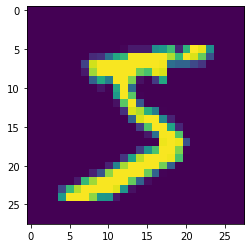

In [7]:
import matplotlib.pyplot as plt #used for data visualization 
plt.imshow(x_train[0])  #ploting the index=0 image


**Reshaping Dataset**

In [8]:

#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape(60000, 28, 28, 1).astype('float32') 
X_test= X_test.reshape(10000, 28, 28, 1).astype('float32')

**One-Hot Encoding**

In [9]:

#one hot encode
number_of_classes = 10 #storing the no. of classes in a variable
y_train= np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test= np_utils.to_categorical (y_test, number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Creating the Model**

In [11]:

#create model
model=Sequential()
#adding model Layer
model.add(Conv2D (64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D (32, (3, 3), activation='relu'))
#model.add(Conv2D (32, (3, 3), activation="relu"))
#flatten the dimension of the image
model.add(Flatten())
#output Layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

**Compiling the Model**

In [12]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


**Fitting the Model**

In [13]:
#fit the model
model.fit(x_train,y_train, validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.2754 - accuracy: 0.9480 - val_loss: 0.1003 - val_accuracy: 0.9709
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9779 - val_loss: 0.0781 - val_accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0796 - val_accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0916 - val_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.1109 - val_accuracy: 0.9758


**Observing the Metrics**

In [14]:
# final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0) 
print("Metrics(Test loss & Test Accuracy): ") 
print(metrics)


Metrics(Test loss & Test Accuracy): 
[0.11093637347221375, 0.9757999777793884]


**Predicting the Output**

In [15]:
prediction=model.predict(x_train[:4]) 
print(prediction)

1/1 [==============================] - 0s 94ms/step
[[2.9683321e-14 9.1312506e-15 7.3521487e-17 1.1804635e-01 7.1459960e-13
  8.8195366e-01 7.8554052e-14 3.0021294e-11 1.1676967e-08 8.9898777e-10]
 [1.0000000e+00 4.0331719e-17 1.6908752e-10 6.9805061e-18 5.1934783e-15
  4.4819905e-14 8.0164257e-09 5.3338643e-15 1.3327360e-10 1.8134657e-11]
 [8.7367539e-28 1.5481910e-13 7.6272712e-16 8.7212481e-18 1.0000000e+00
  6.6877126e-16 8.6866417e-20 5.5682435e-14 2.1180242e-09 1.6320235e-11]
 [6.9933757e-19 1.0000000e+00 7.2040018e-10 1.4640346e-13 9.7670205e-10
  1.6309818e-14 3.1463685e-13 1.9528414e-10 4.4547801e-09 2.1831128e-12]]


In [16]:
import numpy as np
print(np.argmax(prediction, axis=1)) #print our label from first 4 images
print(y_test[:4]) #printing the actual labels

[5 0 4 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Saving the Model**

In [17]:
# save the model
model.save(r'/content/models/mnistCNN.h5')

**Taking images as inputs and checking results**

In [24]:
#importing the keras libraries and packages
from tensorflow.keras.models import load_model
model = load_model(r'/content/models/mnistCNN.h5')
from PIL import Image #used for manipulating image uploaded by the user
import numpy as np #used for numerical analysis
for index in range(4):
  img = Image.open('data/' + str(index) + '.png').convert("L")  #convert image to monochrome
  img=img.resize((28,28))# resizing of input image
  im2arr=np.array(img) #converting to image
  im2arr = im2arr.reshape(1,28,28,1) #reshaping according to our requirement
  #Predicting the Test set results
  y_pred=model.predict(im2arr) #predicting the results
  predict = np.argmax(y_pred)
  print(predict)


1/1 [==============================] - 0s 95ms/step
5
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 14ms/step
4
1/1 [==============================] - 0s 14ms/step
1
